In [1]:
import sys, os
#this is a comment
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir) + "/src/"
sys.path.insert(0, parentdir) 

from modeling import *
from modelchecking import *
from analysis import *
from helper import *
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import pandas as pd

# Define the type_ variable (you may need to set this based on your context)
type_ = 'R'  # Replace 'your_type_here' with the actual type you want to use

# Construct the file path pattern
file_pattern = f'../data/sim/simdf_{type_}.pkl'

# Use glob to find the pkl file
pkl_files = glob.glob(file_pattern)

# Check if any files were found
if pkl_files:
    print(f'Found pkl files: {pkl_files}')
    true = pd.read_pickle(file_pattern)
else:
    print('No pkl files found.')

Found pkl files: ['../data/sim/simdf_R.pkl']


In [3]:
import glob
import json

# Construct the file path pattern for JSON files
json_file_pattern = f'../data/sim/fit/{type_}_value_path.filter_depth'

data_list = []
# Use glob to find the JSON files
for username in true.username:
    with open(f"{json_file_pattern}/{username}.json", 'r') as json_file:
        json_data = json.load(json_file)
        json_data = json_data | {float(key): value for key, value in json_data["filter_params"].items()}
        json_data["username"] = username
        data_list.append(json_data)

df = pd.DataFrame(data_list)


R squared for 0: 0.8783
R squared for 0.25: 0.9707
R squared for 0.5: 0.7651
R squared for 0.75: 0.7106
R squared for 1: 0.8745


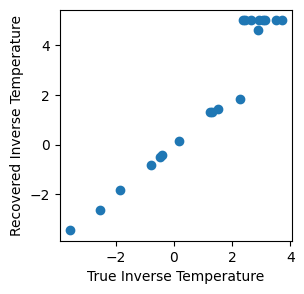

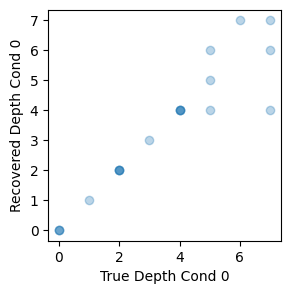

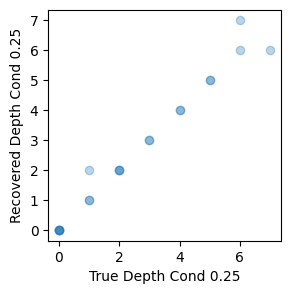

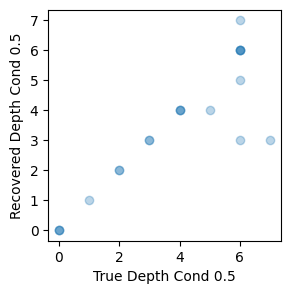

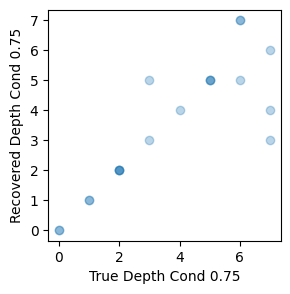

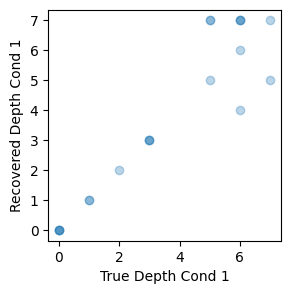

In [4]:
import matplotlib.pyplot as plt
from utils import get_conditions

plt.figure(figsize = (3, 3))
plt.scatter(true.inv_temp, df.inv_temp)
plt.xlabel('True Inverse Temperature')  # Add x-label
plt.ylabel('Recovered Inverse Temperature')  # Add y-label

for i in get_conditions(type_):
    plt.figure(figsize = (3, 3))
    plt.scatter(true[i], df[i], alpha=0.3)
    plt.xlabel(f'True Depth Cond {i}')  # Add x-label for each condition
    plt.ylabel(f'Recovered Depth Cond {i}')  # Add y-label for each condition
    r_squared = np.corrcoef(true[i], df[i])[0, 1] ** 2
    print(f'R squared for {i}: {r_squared:.4f}')